# Titanic Dataset
Using machine Learning to create a model that predicts which passengers survived the Titanic shipwreck.


# Preparing the tools

In [1]:
# Exploratory Data Anaylsis Tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Models evaluators
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

# Load Data

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Women survival rate
women = train_data[train_data["Sex"] == "female"]["Survived"]

In [5]:
rate_of_women = sum(women)/ len(women)

In [6]:
print(f" % of women who survived: {rate_of_women}")

 % of women who survived: 0.7420382165605095


In [7]:
# Men survival rate
men = train_data[train_data["Sex"] == "male"]["Survived"]

In [8]:
rate_of_men = sum(men)/len(men)

In [9]:
print(f" % of men who survived: {rate_of_men}")

 % of men who survived: 0.18890814558058924


In [10]:
# label column
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

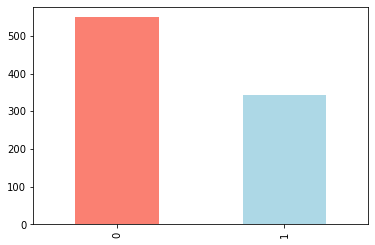

In [11]:
train_data["Survived"].value_counts().plot(kind= "bar", color=["salmon", "lightblue"])

In [12]:
train_data["Sex"].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

<AxesSubplot:ylabel='Sex'>

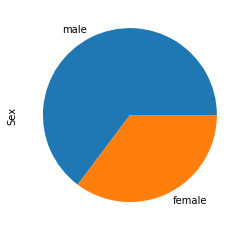

In [13]:
train_data["Sex"].value_counts(normalize=True).plot(kind="pie")

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

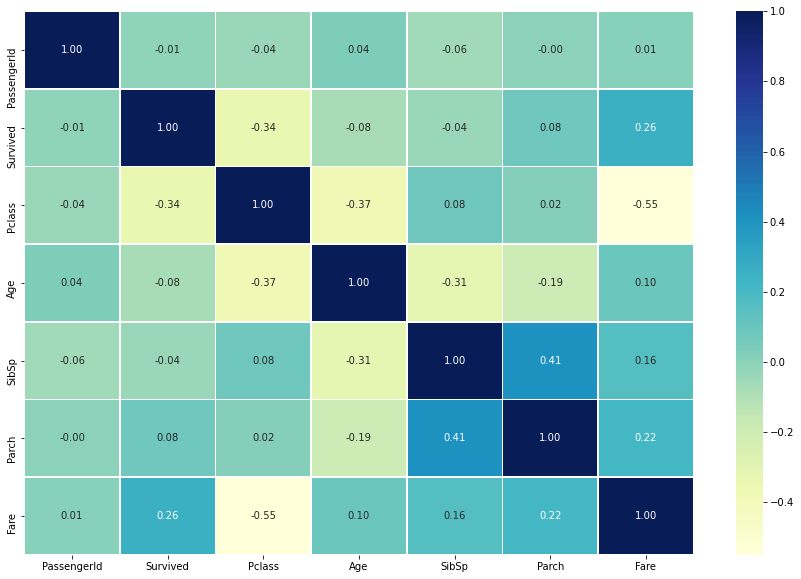

In [16]:
corr_matrix = train_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu")

In [17]:
# Survival Frequency according to gender
pd.crosstab(train_data["Sex"], train_data["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [18]:
women_survival_rate = 233/(81+233)
men_survival_rate = 109/(109+468)
print(f"women survival rate: {women_survival_rate}")
print(f"men survival rate: {men_survival_rate}")

women survival rate: 0.7420382165605095
men survival rate: 0.18890814558058924


(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

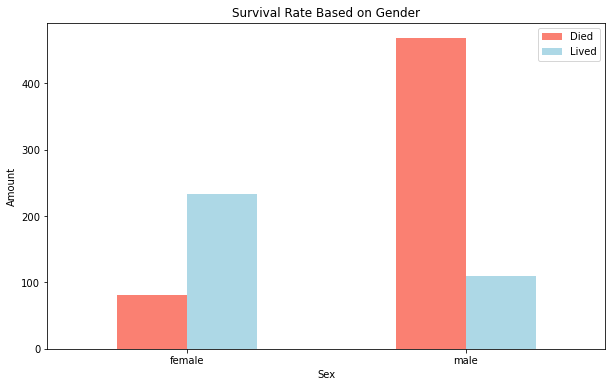

In [19]:
pd.crosstab(train_data["Sex"], train_data["Survived"]).plot(kind="bar",
                                                           figsize=(10,6),
                                                           color= ["salmon", "lightblue"])
plt.title("Survival Rate Based on Gender")
plt.ylabel("Amount")
plt.legend(["Died", "Lived"])
plt.xticks(rotation=0)

In [20]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Fare vs Survived 

Text(0.5, 1.0, 'Not Survived')

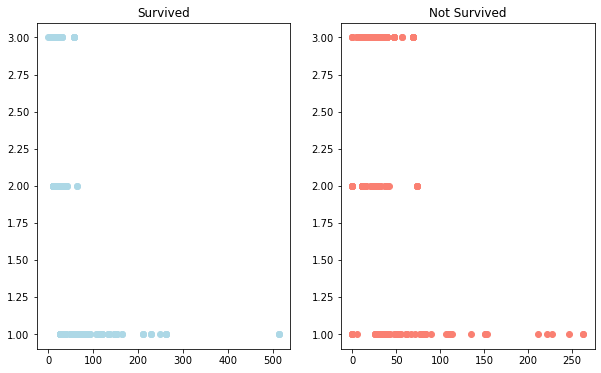

In [21]:
fig, (ax, ax1) = plt.subplots(1, 2,
                              figsize=(10,6))
ax.scatter(train_data[train_data["Survived"]==1]["Fare"],
            train_data[train_data["Survived"]==1]["Pclass"],
            c="lightblue")

ax1.scatter(train_data[train_data["Survived"]==0]["Fare"],
            train_data[train_data["Survived"]==0]["Pclass"],
            c="salmon")

ax.set_title("Survived")
ax1.set_title("Not Survived")

<AxesSubplot:ylabel='Frequency'>

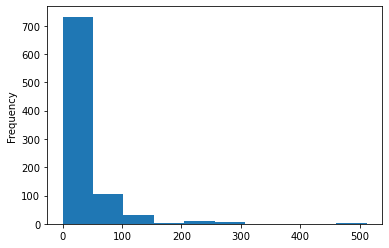

In [22]:
train_data["Fare"].plot(kind="hist")

In [23]:
train_data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

# Modeling

In [24]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
train_data["Gender"] = train_data["Sex"].map({"male":1, "female":0})

In [26]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### Drop 'Cabin' column/ Null values

In [27]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Gender           0
dtype: int64

In [28]:
train_data.drop("Cabin", axis= 1, inplace = True)

In [29]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

In [30]:
train_data.drop("Gender", axis= 1, inplace = True)

## Convert string to categories

In [31]:
for label, content in train_data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
Sex
Ticket
Embarked


In [32]:
# Turn all string values into categories

for label, content in train_data.items():
    if pd.api.types.is_string_dtype(content):
        train_data[label] = content.astype("category").cat.as_ordered()  

In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(5)
memory usage: 115.1 KB


In [34]:
train_data["Sex"].cat.codes

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Length: 891, dtype: int8

In [35]:
train_data.isnull().sum()/ len(train_data)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

### Fill missing values

##### Numerical values first

In [36]:
for label, content in train_data.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


In [37]:
# Check for numeric values that are null
for label, content in train_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            train_data[label] = content.fillna(content.median())

In [38]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

### Filling and turning categorical variables into numbers

In [39]:
for label, content in train_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        train_data[label] = pd.Categorical(content).codes+1

In [40]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [41]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,109,2,22.0,1,0,524,7.2500,3
1,2,1,1,191,1,38.0,1,0,597,71.2833,1
2,3,1,3,354,1,26.0,0,0,670,7.9250,3
3,4,1,1,273,1,35.0,1,0,50,53.1000,3
4,5,0,3,16,2,35.0,0,0,473,8.0500,3


In [42]:
## Split X/y

X = train_data.drop("Survived", axis= 1)
y = train_data["Survived"]

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8)

In [44]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((712, 10), (712,), (179, 10), (179,))

In [45]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
X_test = test_data

In [47]:
# Models

models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "RandomForest": RandomForestClassifier()}

In [48]:
# Function to fit and score models

def fit_and_score(models, X_train, X_val, y_train, y_val):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data
    X_val: validation data
    y_train: labels associated with training data
    y_val: labels associated with test data
    """
    np.random.seed(70)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_val, y_val)
    return model_scores   

In [49]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_val = X_val,
                            y_train = y_train,
                            y_val = y_val)
model_scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6256983240223464,
 'Logistic Regression': 0.7374301675977654,
 'RandomForest': 0.8044692737430168}

### Model comparision

In [50]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare

,KNN,Logistic Regression,RandomForest
accuracy,0.625698,0.73743,0.804469


(array([0, 1, 2]),
 [Text(0, 0, 'KNN'),
  Text(1, 0, 'Logistic Regression'),
  Text(2, 0, 'RandomForest')])

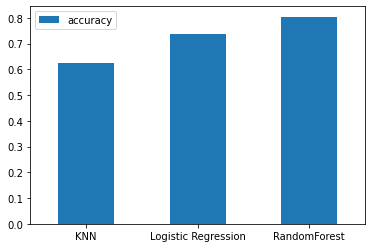

In [51]:
model_compare.T.plot(kind="bar")
plt.xticks(rotation= 0)

## Hyperparameter Tuning with RandomizedSearchCV

In [52]:
# LogisticRegeression grid
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

#RandomForest grid

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

##### LogisticRegression

In [53]:
np.random.seed(70)

rs_log_model = RandomizedSearchCV(estimator = LogisticRegression(),
                                 param_distributions= log_reg_grid,
                                 cv = 5,
                                 n_iter= 20, 
                                 verbose= True)

#fit model
rs_log_model.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [54]:
rs_log_model.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [55]:
rs_log_model.score(X_val, y_val)

0.7653631284916201

### RandomizedForestClass

In [56]:
np.random.seed(70)
rf_model = RandomizedSearchCV(RandomForestClassifier(),
                                 param_distributions=rf_grid,
                                 verbose= True,
                                 cv= 5,
                                 n_iter= 20)
#fit model
rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [57]:
rf_model.best_params_

{'n_estimators': 960,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': None}

In [58]:
rf_model.score(X_val, y_val)

0.7988826815642458

In [59]:
# Further Tuning RandomForest with gridsearch
rf_grid = {"n_estimators": np.arange(300, 1000, 100),
          "max_depth": [None, 4],
          "min_samples_split": np.arange(2, 15, 2),
          "min_samples_leaf": np.arange(1, 5, 1)}


gs_rf = GridSearchCV(RandomForestClassifier(),
                    param_grid= rf_grid,
                    cv= 5,
                    verbose= True,
                    n_jobs= -1)

gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 392 candidates, totalling 1960 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 4],
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'n_estimators': array([300, 400, 500, 600, 700, 800, 900])},
             verbose=True)

In [60]:
#Evaluate model
gs_rf.score(X_val, y_val)

0.8100558659217877

# Evaluating model

* ROC curve and AUC score - plot_roc_curve()
* Confusion matrix - confusion_matrix()
* Classification report - classification_report()
* Precision - precision_score()
* Recall - recall_score()
* F1-score - f1_score()

In [61]:
y_preds = gs_rf.predict(X_val)

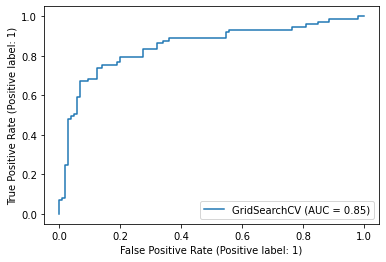

In [62]:
# Plot Roc curve
plot_roc_curve(gs_rf, X_val, y_val)

In [63]:
# Confusion matrix
confusion_matrix(y_val, y_preds)

array([[96, 10],
       [24, 49]], dtype=int64)

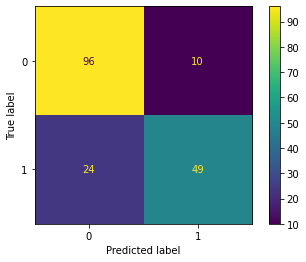

In [64]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gs_rf, X_val, y_val)

In [65]:
report = classification_report(y_val, y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       106
           1       0.83      0.67      0.74        73

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [66]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 600}

### Train model on best params

In [67]:
model = RandomForestClassifier( max_depth= None,
                                min_samples_leaf= 1,
                                min_samples_split= 2,
                                n_estimators = 300)

#fit model

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [68]:
model.score(X_val, y_val)

0.8212290502793296

# Predictions

In [69]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [70]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
104,105,3,313,2,37.0,2,0,246,7.9250,3
56,57,2,708,1,21.0,0,0,556,10.5000,3
199,200,2,882,1,24.0,0,0,161,13.0000,3
471,472,3,125,2,38.0,0,0,264,8.6625,3
169,170,3,487,2,28.0,0,0,81,56.4958,3


In [71]:
X_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [72]:
for label, content in X_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age
Fare


In [79]:
# Create function to preproces test data

def preprocess_data(df):
    df.drop("Cabin", axis= 1 , inplace = True)
    # fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label] = content.fillna(content.median())
    # Turn cateorical variable into numbers  
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes+1
    return df

In [80]:
X_test = preprocess_data(test_data)
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,207,2,34.5,0,0,153,7.8292,2
1,893,3,404,1,47.0,1,0,222,7.0000,3
2,894,2,270,2,62.0,0,0,74,9.6875,2
3,895,3,409,2,27.0,0,0,148,8.6625,3
4,896,3,179,1,22.0,1,1,139,12.2875,3


In [81]:
X_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [83]:
# prediction
predictions = model.predict(X_test)
predictions[:50]

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0], dtype=int64)

In [84]:
output = pd.DataFrame({"PassengerId": X_test["PassengerId"], "Survived": predictions})
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [85]:
output.to_csv("submission.csv", index= False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [2]:
pd.read_csv("submission.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
